# Our objective is to predict the level of damage grade to buildings caused by the 2015 Gorkha earthquake in Nepal with the highest possible accuracy using Machine Learning Models.

In [70]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

## Data Preparation

In [71]:
trainData = pd.read_csv('train_values.csv')
trainData.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [72]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [73]:
testData = pd.read_csv('test_values.csv')
testData.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [74]:
damageData = pd.read_csv('train_labels.csv')
damageData.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [75]:
trainData = trainData.merge(damageData, on = 'building_id')
trainData.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


## Check the size of the data

In [76]:
print("Train Dataset size: ",trainData.shape)
print("Damage Dataset size: ",damageData.shape)
print("Test Dataset size: ",testData.shape)

Train Dataset size:  (260601, 40)
Damage Dataset size:  (260601, 2)
Test Dataset size:  (86868, 39)


## Data Cleaning

### In order to perform Machine Learning based on these categorical data, we will need to convert the data into numeric form by using label encoding before applying learning algorithm on them

In [77]:
# Categorical Columns
cat_columns = ['land_surface_condition', 'foundation_type', 'roof_type',
                           'ground_floor_type', 'other_floor_type', 'position',
                           'plan_configuration', 'legal_ownership_status']

# label encoding the categorical columns in train dataset 
for i in cat_columns:
    trainData[i]=trainData[i].astype("category") # convert to category data type
    trainData[i]=trainData[i].cat.codes          #.cat.codes is to label encoding
trainData.head()

# label encoding the categorical columns in test dataset 
for i in cat_columns:
    testData[i]=testData[i].astype("category")
    testData[i]=testData[i].cat.codes
testData.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,2,2,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,2,2,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,2,2,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,2,2,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,2,2,...,0,0,0,0,0,0,0,0,0,0


## Check for any Null Values

In [78]:
print('Train Dataset has {} null values'.format(sum(trainData.isnull().any())))
print('Test Dataset has {} null values'.format(sum(testData.isnull().any())))
print('Train Damage Dataset has {} null values'.format(sum(damageData.isnull().any())))

Train Dataset has 0 null values
Test Dataset has 0 null values
Train Damage Dataset has 0 null values


## Find out which damage grade is the highest

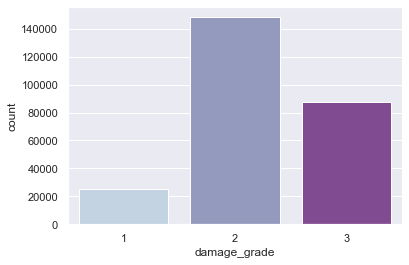

In [79]:
sb.countplot(damageData["damage_grade"], palette = "BuPu")

## Correlation with Damage Grade

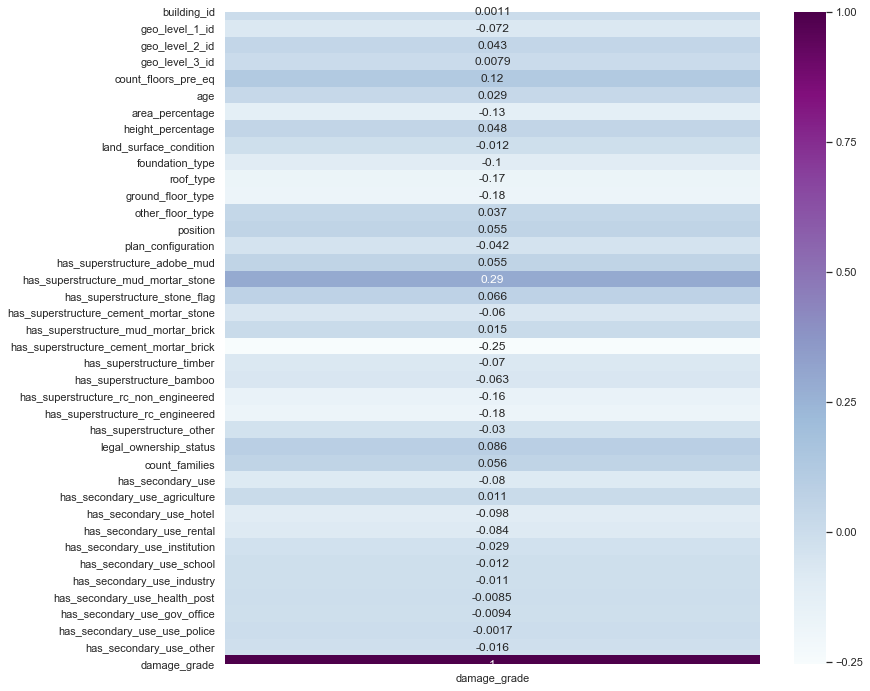

In [80]:
plt.figure(figsize=(12,12))
cor=pd.DataFrame(trainData.corr()["damage_grade"])
sb.heatmap(cor,annot=True, cmap = "BuPu")

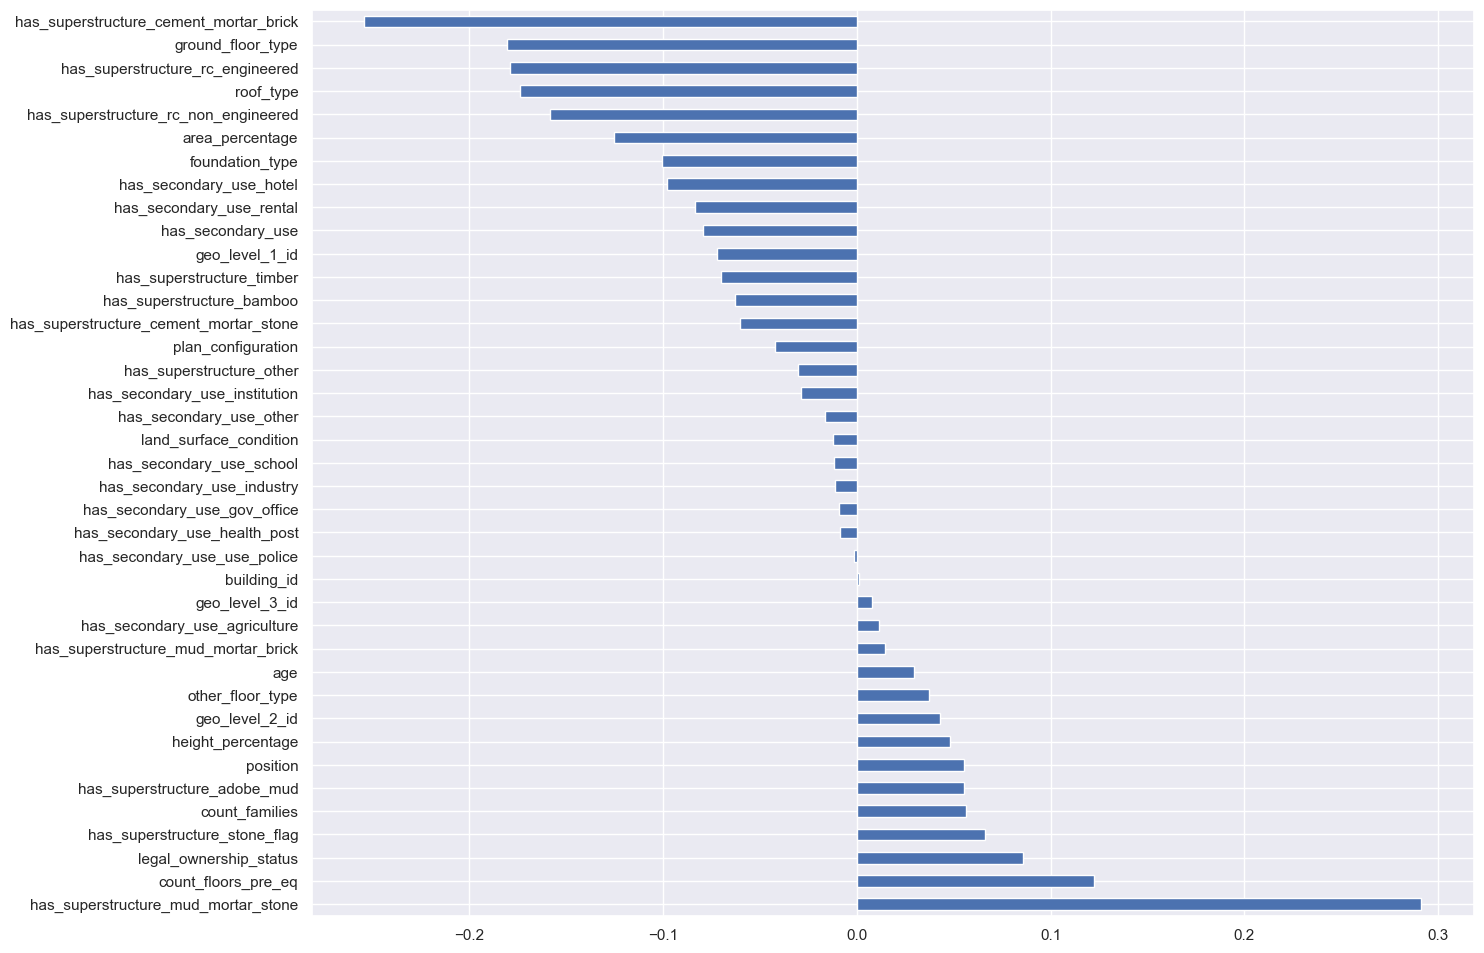

In [81]:
plt.figure(figsize=(15,12), dpi=100)
cor.damage_grade.drop('damage_grade').sort_values(ascending=False).plot.barh()

### Observation: From here, we can see that has_superstructure_mud_mortar_stone, has_superstructure_cement_mortar_brick, ground_floor_type, has_superstructure_rc_engineered and roof_type 

## Statistical Visualization

## The greater the difference in spreads across the damage grade, the higher the correlation between the categorical variable and the level of damage grade

1    198561
0     62040
Name: has_superstructure_mud_mortar_stone, dtype: int64

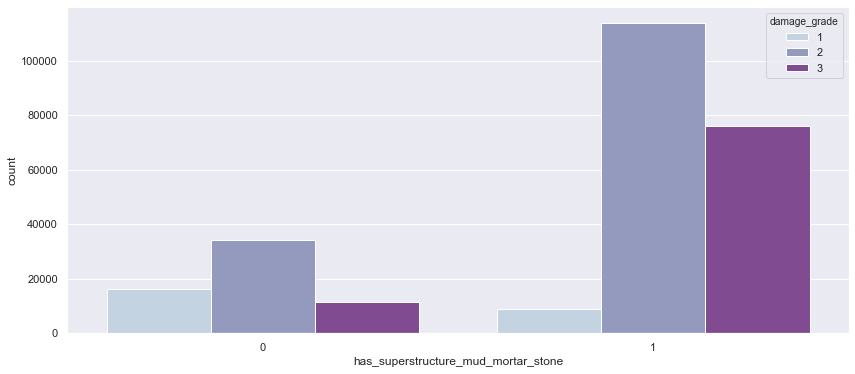

In [82]:
plt.figure(figsize=(14,6))
sb.countplot(data=trainData,x='has_superstructure_mud_mortar_stone',hue='damage_grade', palette = "BuPu")
trainData['has_superstructure_mud_mortar_stone'].value_counts()

0    240986
1     19615
Name: has_superstructure_cement_mortar_brick, dtype: int64

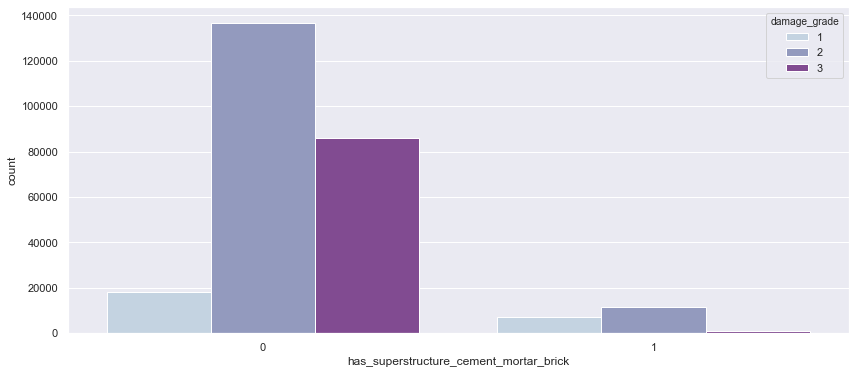

In [83]:
plt.figure(figsize=(14,6))
sb.countplot(data=trainData,x='has_superstructure_cement_mortar_brick',hue='damage_grade', palette = "BuPu")
trainData['has_superstructure_cement_mortar_brick'].value_counts()

0    256468
1      4133
Name: has_superstructure_rc_engineered, dtype: int64

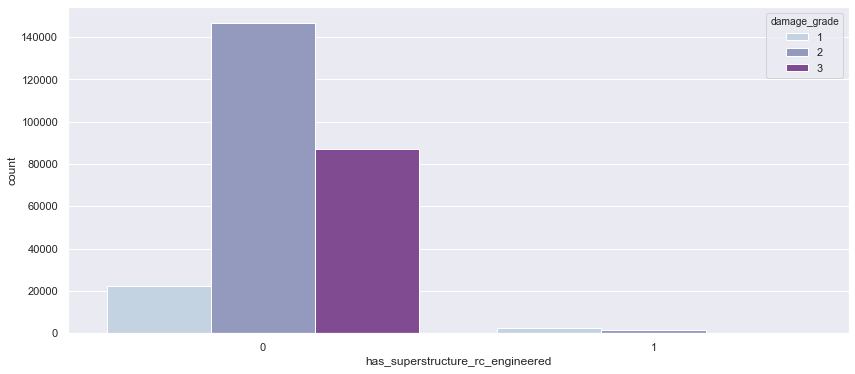

In [84]:
plt.figure(figsize=(14,6))
sb.countplot(data=trainData,x='has_superstructure_rc_engineered',hue='damage_grade', palette = "BuPu")
trainData['has_superstructure_rc_engineered'].value_counts()

0    209619
3     24877
2     24593
4      1004
1       508
Name: ground_floor_type, dtype: int64

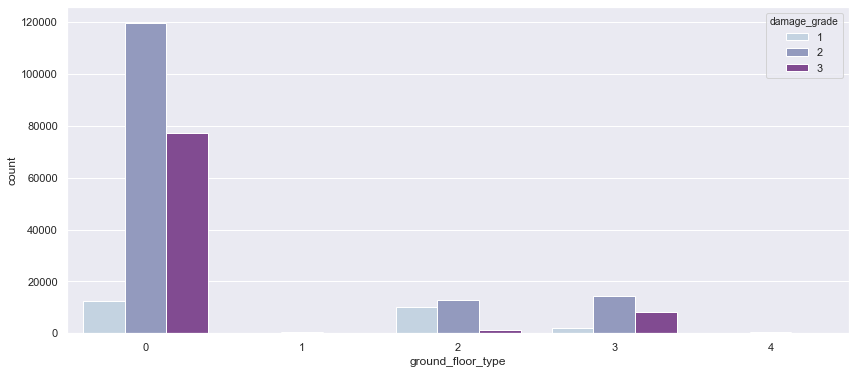

In [85]:
plt.figure(figsize=(14,6))
sb.countplot(data=trainData,x='ground_floor_type',hue='damage_grade', palette = "BuPu")
trainData['ground_floor_type'].value_counts()

0    182842
1     61576
2     16183
Name: roof_type, dtype: int64

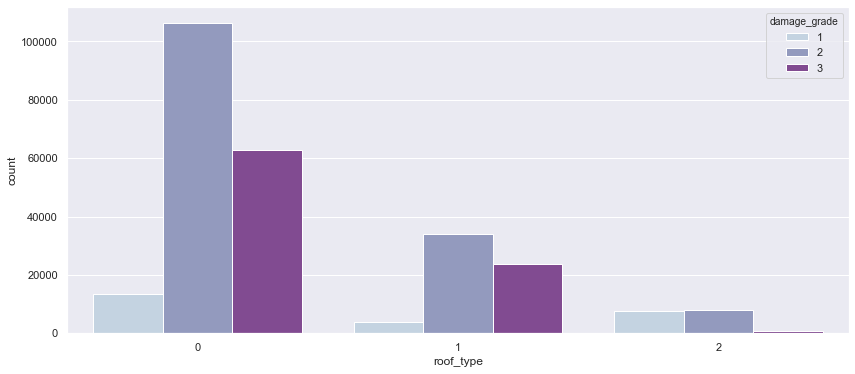

In [86]:
plt.figure(figsize=(14,6))
sb.countplot(data=trainData,x='roof_type',hue='damage_grade', palette = "BuPu")
trainData['roof_type'].value_counts()

# Waffle Chart

In [87]:
from pywaffle import Waffle

#separate the different grades into diff dataframe
grade_df = trainData.copy()

grade_1_df = grade_df.loc[grade_df['damage_grade'] == 1]
grade_2_df = grade_df.loc[grade_df['damage_grade'] == 2]
grade_3_df = grade_df.loc[grade_df['damage_grade'] == 3]

grade 1 has_superstructure_mud_mortar_stone (“1” : “0”) : (8760:16364)
grade 2 has_superstructure_mud_mortar_stone (“1” : “0”) : (113947:34312)
grade 3 has_superstructure_mud_mortar_stone (“1” : “0”) : (75854:11364)


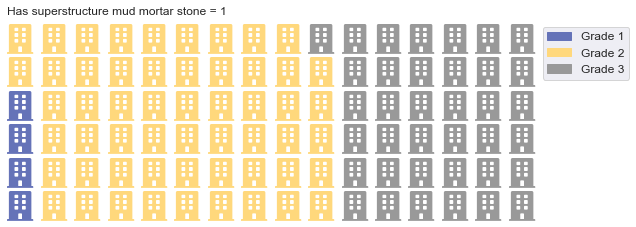

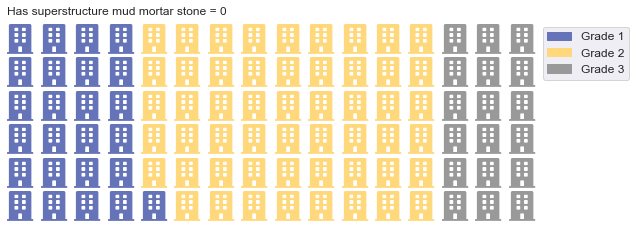

In [88]:
##-------------has_superstructure_mud_mortar_stone------------

#get count of 1 and 0 for different column variable base on different grade dataframe
grade1_mud_mortar_stone_1 = len(grade_1_df[grade_1_df['has_superstructure_mud_mortar_stone'] == 1].index)
grade1_mud_mortar_stone_0 = len(grade_1_df[grade_1_df['has_superstructure_mud_mortar_stone'] == 0].index)
print("grade 1 has_superstructure_mud_mortar_stone (“1” : “0”) : ("+str(grade1_mud_mortar_stone_1)+":"+str(grade1_mud_mortar_stone_0)+")")

grade2_mud_mortar_stone_1 = len(grade_2_df[grade_2_df['has_superstructure_mud_mortar_stone'] == 1].index)
grade2_mud_mortar_stone_0 = len(grade_2_df[grade_2_df['has_superstructure_mud_mortar_stone'] == 0].index)
print("grade 2 has_superstructure_mud_mortar_stone (“1” : “0”) : ("+str(grade2_mud_mortar_stone_1)+":"+str(grade2_mud_mortar_stone_0)+")")

grade3_mud_mortar_stone_1 = len(grade_3_df[grade_3_df['has_superstructure_mud_mortar_stone'] == 1].index)
grade3_mud_mortar_stone_0 = len(grade_3_df[grade_3_df['has_superstructure_mud_mortar_stone'] == 0].index)
print("grade 3 has_superstructure_mud_mortar_stone (“1” : “0”) : ("+str(grade3_mud_mortar_stone_1)+":"+str(grade3_mud_mortar_stone_0)+")")


data_of_1 = {'Grade 1': grade1_mud_mortar_stone_1, 'Grade 2': grade2_mud_mortar_stone_1, 'Grade 3': grade3_mud_mortar_stone_1}
data_of_0 = {'Grade 1': grade1_mud_mortar_stone_0, 'Grade 2': grade2_mud_mortar_stone_0, 'Grade 3': grade3_mud_mortar_stone_0}


#figure for column with value 1 for grade 1,2,3
fig_1 = plt.figure(
    title = {'label': 'Has superstructure mud mortar stone = 1 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_1,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 0 for grade 1,2,3
fig_0 = plt.figure(
    title = {'label': 'Has superstructure mud mortar stone = 0 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_0,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)
fig_1.gca().set_facecolor('#FFFFFF')
fig_1.set_facecolor('#FFFFFF')
fig_0.gca().set_facecolor('#FFFFFF')
fig_0.set_facecolor('#FFFFFF')
plt.show()

## when the size arrangement of the grades in both charts are different = they have good correlation to damage grade
## if same means no correlation

grade 1 has_superstructure_cement_mortar_brick (“1” : “0”) : (7105:18019)
grade 2 has_superstructure_cement_mortar_brick (“1” : “0”) : (11421:136838)
grade 3 has_superstructure_cement_mortar_brick (“1” : “0”) : (1089:86129)


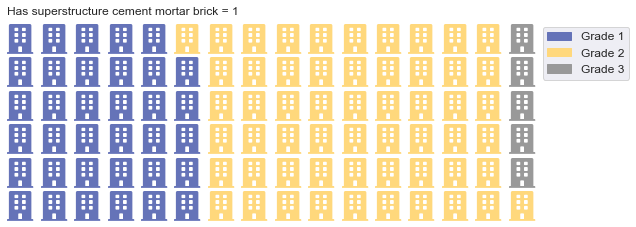

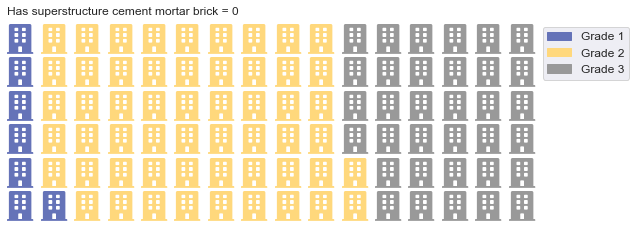

In [89]:
##-------------has_superstructure_cement_mortar_brick------------

#get count of 1 and 0 for different column variable base on different grade dataframe
grade1_cement_mortar_brick_1 = len(grade_1_df[grade_1_df['has_superstructure_cement_mortar_brick'] == 1].index)
grade1_cement_mortar_brick_0 = len(grade_1_df[grade_1_df['has_superstructure_cement_mortar_brick'] == 0].index)
print("grade 1 has_superstructure_cement_mortar_brick (“1” : “0”) : ("+str(grade1_cement_mortar_brick_1)+":"+str(grade1_cement_mortar_brick_0)+")")

grade2_cement_mortar_brick_1 = len(grade_2_df[grade_2_df['has_superstructure_cement_mortar_brick'] == 1].index)
grade2_cement_mortar_brick_0 = len(grade_2_df[grade_2_df['has_superstructure_cement_mortar_brick'] == 0].index)
print("grade 2 has_superstructure_cement_mortar_brick (“1” : “0”) : ("+str(grade2_cement_mortar_brick_1)+":"+str(grade2_cement_mortar_brick_0)+")")

grade3_cement_mortar_brick_1 = len(grade_3_df[grade_3_df['has_superstructure_cement_mortar_brick'] == 1].index)
grade3_cement_mortar_brick_0 = len(grade_3_df[grade_3_df['has_superstructure_cement_mortar_brick'] == 0].index)
print("grade 3 has_superstructure_cement_mortar_brick (“1” : “0”) : ("+str(grade3_cement_mortar_brick_1)+":"+str(grade3_cement_mortar_brick_0)+")")


data_of_1 = {'Grade 1': grade1_cement_mortar_brick_1, 'Grade 2': grade2_cement_mortar_brick_1, 'Grade 3': grade3_cement_mortar_brick_1}
data_of_0 = {'Grade 1': grade1_cement_mortar_brick_0, 'Grade 2': grade2_cement_mortar_brick_0, 'Grade 3': grade3_cement_mortar_brick_0}


#figure for column with value 1 for grade 1,2,3
fig_1 = plt.figure(
    title = {'label': 'Has superstructure cement mortar brick = 1 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_1,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 0 for grade 1,2,3
fig_0 = plt.figure(
    title = {'label': 'Has superstructure cement mortar brick = 0 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_0,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)
fig_1.gca().set_facecolor('#FFFFFF')
fig_1.set_facecolor('#FFFFFF')
fig_0.gca().set_facecolor('#FFFFFF')
fig_0.set_facecolor('#FFFFFF')
plt.show()

## when the size arrangement of the grades in both charts are different = they have good correlation to damage grade
## if same means no correlation

grade 1 has_superstructure_rc_engineered (“1” : “0”) : (2656:22468)
grade 2 has_superstructure_rc_engineered (“1” : “0”) : (1402:146857)
grade 3 has_superstructure_rc_engineered (“1” : “0”) : (75:87143)


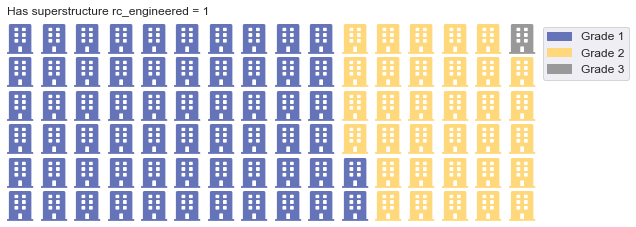

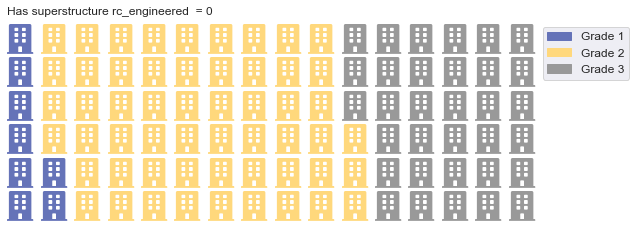

In [90]:
##-------------has_superstructure_rc_engineered------------

#get count of 1 and 0 for different column variable base on different grade dataframe
grade1_rc_engineered_1 = len(grade_1_df[grade_1_df['has_superstructure_rc_engineered'] == 1].index)
grade1_rc_engineered_0 = len(grade_1_df[grade_1_df['has_superstructure_rc_engineered'] == 0].index)
print("grade 1 has_superstructure_rc_engineered (“1” : “0”) : ("+str(grade1_rc_engineered_1)+":"+str(grade1_rc_engineered_0)+")")

grade2_rc_engineered_1 = len(grade_2_df[grade_2_df['has_superstructure_rc_engineered'] == 1].index)
grade2_rc_engineered_0 = len(grade_2_df[grade_2_df['has_superstructure_rc_engineered'] == 0].index)
print("grade 2 has_superstructure_rc_engineered (“1” : “0”) : ("+str(grade2_rc_engineered_1)+":"+str(grade2_rc_engineered_0)+")")

grade3_rc_engineered_1 = len(grade_3_df[grade_3_df['has_superstructure_rc_engineered'] == 1].index)
grade3_rc_engineered_0 = len(grade_3_df[grade_3_df['has_superstructure_rc_engineered'] == 0].index)
print("grade 3 has_superstructure_rc_engineered (“1” : “0”) : ("+str(grade3_rc_engineered_1)+":"+str(grade3_rc_engineered_0)+")")


data_of_1 = {'Grade 1': grade1_rc_engineered_1, 'Grade 2': grade2_rc_engineered_1, 'Grade 3': grade3_rc_engineered_1}
data_of_0 = {'Grade 1': grade1_rc_engineered_0, 'Grade 2': grade2_rc_engineered_0, 'Grade 3': grade3_rc_engineered_0}


#figure for column with value 1 for grade 1,2,3
fig_1 = plt.figure(
    title = {'label': 'Has superstructure rc_engineered = 1 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_1,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 0 for grade 1,2,3
fig_0 = plt.figure(
    title = {'label': 'Has superstructure rc_engineered  = 0 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_0,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)
fig_1.gca().set_facecolor('#FFFFFF')
fig_1.set_facecolor('#FFFFFF')
fig_0.gca().set_facecolor('#FFFFFF')
fig_0.set_facecolor('#FFFFFF')
plt.show()


## when the size arrangement of the grades in both charts are different = they have good correlation to damage grade
## if same means no correlation

In [91]:
grade_1_df['roof_type'].unique()

array([1, 0, 2], dtype=int64)

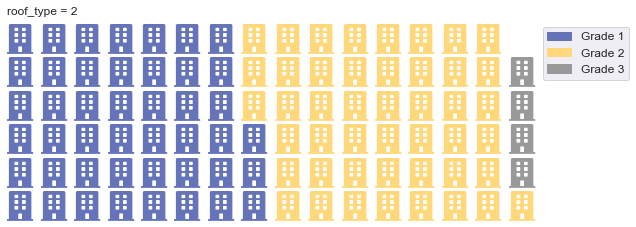

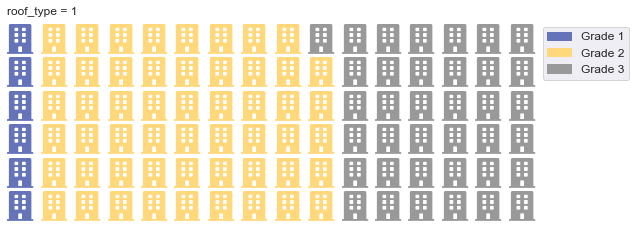

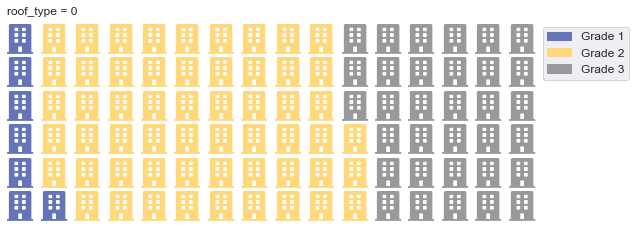

In [92]:
##-------------roof_type------------

#get count of 2, 1 and 0 for different column variable base on different grade dataframe
grade1_roof_type_2 = len(grade_1_df[grade_1_df['roof_type'] == 2].index)
grade1_roof_type_1 = len(grade_1_df[grade_1_df['roof_type'] == 1].index)
grade1_roof_type_0 = len(grade_1_df[grade_1_df['roof_type'] == 0].index)

grade2_roof_type_2 = len(grade_2_df[grade_2_df['roof_type'] == 2].index)
grade2_roof_type_1 = len(grade_2_df[grade_2_df['roof_type'] == 1].index)
grade2_roof_type_0 = len(grade_2_df[grade_2_df['roof_type'] == 0].index)

grade3_roof_type_2 = len(grade_3_df[grade_3_df['roof_type'] == 2].index)
grade3_roof_type_1 = len(grade_3_df[grade_3_df['roof_type'] == 1].index)
grade3_roof_type_0 = len(grade_3_df[grade_3_df['roof_type'] == 0].index)

data_of_2 = {'Grade 1': grade1_roof_type_2, 'Grade 2': grade2_roof_type_2, 'Grade 3': grade3_roof_type_2}
data_of_1 = {'Grade 1': grade1_roof_type_1, 'Grade 2': grade2_roof_type_1, 'Grade 3': grade3_roof_type_1}
data_of_0 = {'Grade 1': grade1_roof_type_0, 'Grade 2': grade2_roof_type_0, 'Grade 3': grade3_roof_type_0}

#figure for column with value 2 for grade 1,2,3
fig_2 = plt.figure(
    title = {'label': 'roof_type = 2 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_2,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 1 for grade 1,2,3
fig_1 = plt.figure(
    title = {'label': 'roof_type = 1 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_1,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 0 for grade 1,2,3
fig_0 = plt.figure(
    title = {'label': 'roof_type = 0 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_0,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)
fig_2.gca().set_facecolor('#FFFFFF')
fig_2.set_facecolor('#FFFFFF')
fig_1.gca().set_facecolor('#FFFFFF')
fig_1.set_facecolor('#FFFFFF')
fig_0.gca().set_facecolor('#FFFFFF')
fig_0.set_facecolor('#FFFFFF')
plt.show()


## when the size arrangement of the grades in both charts are different = they have good correlation to damage grade
## if same means no correlation

In [93]:
grade_1_df['ground_floor_type'].unique()

array([2, 0, 4, 3, 1], dtype=int64)

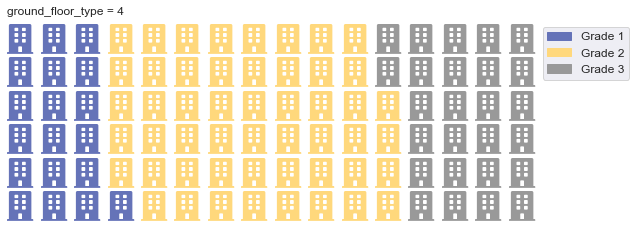

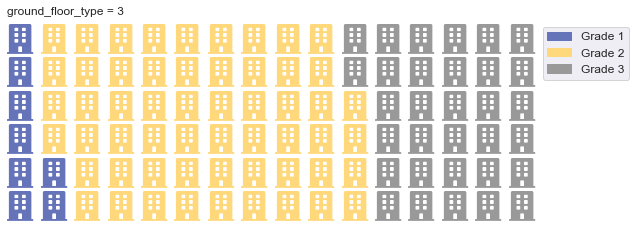

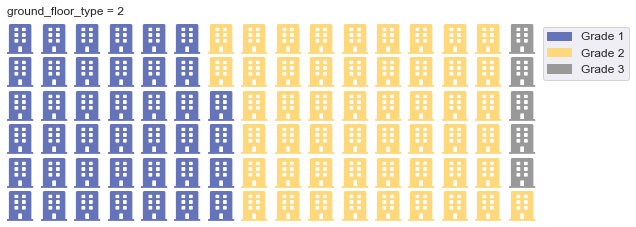

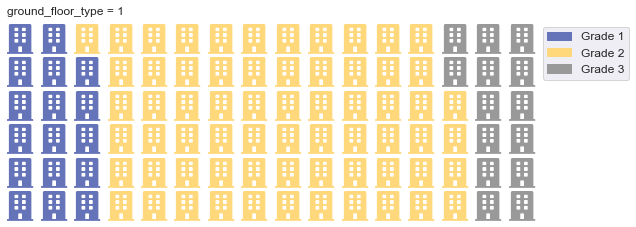

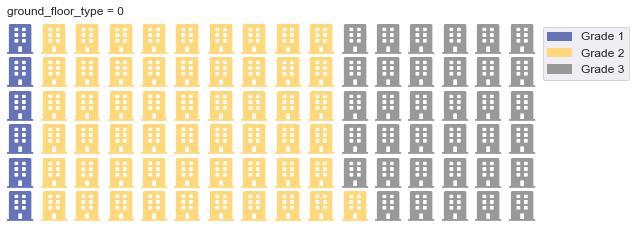

In [94]:
##-------------ground_floor_type------------

#get count of 4,3 2, 1 and 0 for different column variable base on different grade dataframe
grade1_ground_floor_type_4 = len(grade_1_df[grade_1_df['ground_floor_type'] == 4].index)
grade1_ground_floor_type_3 = len(grade_1_df[grade_1_df['ground_floor_type'] == 3].index)
grade1_ground_floor_type_2 = len(grade_1_df[grade_1_df['ground_floor_type'] == 2].index)
grade1_ground_floor_type_1 = len(grade_1_df[grade_1_df['ground_floor_type'] == 1].index)
grade1_ground_floor_type_0 = len(grade_1_df[grade_1_df['ground_floor_type'] == 0].index)


grade2_ground_floor_type_4 = len(grade_2_df[grade_2_df['ground_floor_type'] == 4].index)
grade2_ground_floor_type_3 = len(grade_2_df[grade_2_df['ground_floor_type'] == 3].index)
grade2_ground_floor_type_2 = len(grade_2_df[grade_2_df['ground_floor_type'] == 2].index)
grade2_ground_floor_type_1 = len(grade_2_df[grade_2_df['ground_floor_type'] == 1].index)
grade2_ground_floor_type_0 = len(grade_2_df[grade_2_df['ground_floor_type'] == 0].index)

grade3_ground_floor_type_4 = len(grade_3_df[grade_3_df['ground_floor_type'] == 4].index)
grade3_ground_floor_type_3 = len(grade_3_df[grade_3_df['ground_floor_type'] == 3].index)
grade3_ground_floor_type_2 = len(grade_3_df[grade_3_df['ground_floor_type'] == 2].index)
grade3_ground_floor_type_1 = len(grade_3_df[grade_3_df['ground_floor_type'] == 1].index)
grade3_ground_floor_type_0 = len(grade_3_df[grade_3_df['ground_floor_type'] == 0].index)

data_of_4 = {'Grade 1': grade1_ground_floor_type_4, 'Grade 2': grade2_ground_floor_type_4, 'Grade 3': grade3_ground_floor_type_4}
data_of_3 = {'Grade 1': grade1_ground_floor_type_3, 'Grade 2': grade2_ground_floor_type_3, 'Grade 3': grade3_ground_floor_type_3}
data_of_2 = {'Grade 1': grade1_ground_floor_type_2, 'Grade 2': grade2_ground_floor_type_2, 'Grade 3': grade3_ground_floor_type_2}
data_of_1 = {'Grade 1': grade1_ground_floor_type_1, 'Grade 2': grade2_ground_floor_type_1, 'Grade 3': grade3_ground_floor_type_1}
data_of_0 = {'Grade 1': grade1_ground_floor_type_0, 'Grade 2': grade2_ground_floor_type_0, 'Grade 3': grade3_ground_floor_type_0}

#figure for column with value 4 for grade 1,2,3
fig_4 = plt.figure(
    title = {'label': 'ground_floor_type = 4 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_4,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 3 for grade 1,2,3
fig_3 = plt.figure(
    title = {'label': 'ground_floor_type = 3 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_3,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 2 for grade 1,2,3
fig_2 = plt.figure(
    title = {'label': 'ground_floor_type = 2 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_2,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 1 for grade 1,2,3
fig_1 = plt.figure(
    title = {'label': 'ground_floor_type = 1 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_1,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 0 for grade 1,2,3
fig_0 = plt.figure(
    title = {'label': 'ground_floor_type = 0 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_0,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

fig_4.gca().set_facecolor('#FFFFFF')
fig_4.set_facecolor('#FFFFFF')

fig_3.gca().set_facecolor('#FFFFFF')
fig_3.set_facecolor('#FFFFFF')

fig_2.gca().set_facecolor('#FFFFFF')
fig_2.set_facecolor('#FFFFFF')

fig_1.gca().set_facecolor('#FFFFFF')
fig_1.set_facecolor('#FFFFFF')

fig_0.gca().set_facecolor('#FFFFFF')
fig_0.set_facecolor('#FFFFFF')
plt.show()


## when the size arrangement of the grades in both charts are different = they have good correlation to damage grade
## if same means no correlation

## Example of a weak relation -has_superstructure_mud_mortar_brick

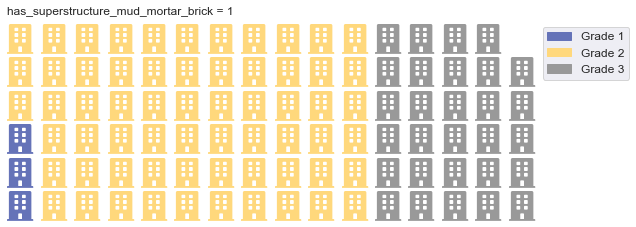

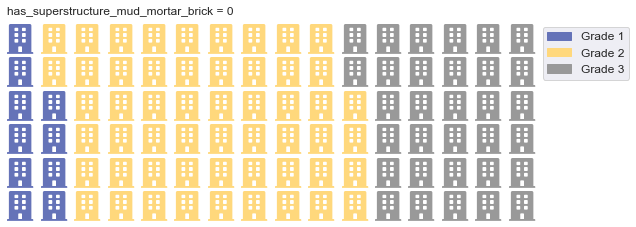

In [95]:
##-------------has_superstructure_mud_mortar_brick------------

#get count of 1 and 0 for different column variable base on different grade dataframe
grade1_mud_mortar_brick_1 = len(grade_1_df[grade_1_df['has_superstructure_mud_mortar_brick'] == 1].index)
grade1_mud_mortar_brick_0 = len(grade_1_df[grade_1_df['has_superstructure_mud_mortar_brick'] == 0].index)
#print("grade 1 has_superstructure_mud_mortar_stone (“1” : “0”) : ("+str(grade1_mud_mortar_stone_1)+":"+str(grade1_mud_mortar_stone_0)+")")

grade2_mud_mortar_brick_1 = len(grade_2_df[grade_2_df['has_superstructure_mud_mortar_brick'] == 1].index)
grade2_mud_mortar_brick_0 = len(grade_2_df[grade_2_df['has_superstructure_mud_mortar_brick'] == 0].index)
#print("grade 2 has_superstructure_mud_mortar_stone (“1” : “0”) : ("+str(grade2_mud_mortar_stone_1)+":"+str(grade2_mud_mortar_stone_0)+")")

grade3_mud_mortar_brick_1 = len(grade_3_df[grade_3_df['has_superstructure_mud_mortar_brick'] == 1].index)
grade3_mud_mortar_brick_0 = len(grade_3_df[grade_3_df['has_superstructure_mud_mortar_brick'] == 0].index)
#print("grade 3 has_superstructure_mud_mortar_stone (“1” : “0”) : ("+str(grade3_mud_mortar_stone_1)+":"+str(grade3_mud_mortar_stone_0)+")")


data_of_1 = {'Grade 1': grade1_mud_mortar_brick_1, 'Grade 2': grade2_mud_mortar_brick_1, 'Grade 3': grade3_mud_mortar_brick_1}
data_of_0 = {'Grade 1': grade1_mud_mortar_brick_0, 'Grade 2': grade2_mud_mortar_brick_0, 'Grade 3': grade3_mud_mortar_brick_0}


#figure for column with value 1 for grade 1,2,3
fig_1 = plt.figure(
    title = {'label': 'has_superstructure_mud_mortar_brick = 1 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_1,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)

#figure for column with value 0 for grade 1,2,3
fig_0 = plt.figure(
    title = {'label': 'has_superstructure_mud_mortar_brick = 0 ', 'loc': 'left','fontsize': 12},
    FigureClass=Waffle,
    rows=6,
    columns=16,
    values=data_of_0,
    colors=("#6573B8", "#FFD87C", "#999999"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1),'fontsize': 12},
    #characters='X',
    icons='building', icon_size=30, 
    font_size=14,
    figsize=(9, 10),
)
fig_1.gca().set_facecolor('#FFFFFF')
fig_1.set_facecolor('#FFFFFF')
fig_0.gca().set_facecolor('#FFFFFF')
fig_0.set_facecolor('#FFFFFF')
plt.show()

## when the size arrangement of the grades in both charts are different = they have good correlation to damage grade
## if same means weak correlation

## Drop unnecessary columns

In [96]:
damageData.drop(['building_id'], axis=1, inplace=True)
trainData.drop(['building_id', 'damage_grade'], axis=1, inplace=True)
testData.drop(['building_id'], axis=1, inplace=True)

## Decision Tree Classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import time
start_time = time.time()

y = damageData
x = trainData 

#Split the dataset randomly into 80% for train dataset and 20% for test dataset
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.20)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6)  # create the decision tree object
dectree.fit(x_train, y_train) 

print("--- %s seconds ---" % (time.time() - start_time))

--- 1.5484035015106201 seconds ---


## Confusion Matrix and Classification Accuracy of Decision Tree Model

Goodness of Fit of Decision Tree Model
Classification Accuracy for Train Dataset 	: 0.6586579048349962
Classification Accuracy for Test Dataset 	: 0.6598300109360911



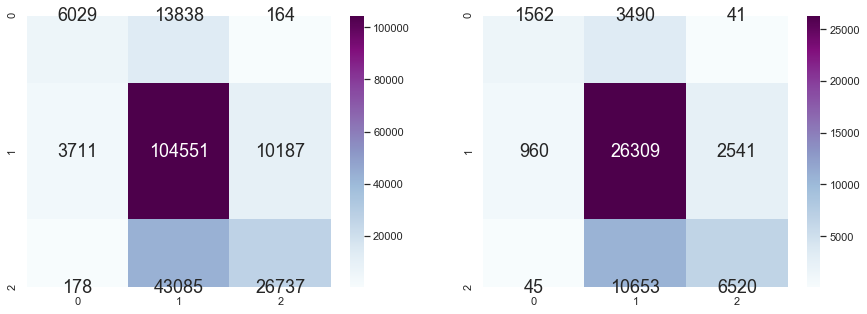

In [98]:
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

# Check the Goodness of Fit
print("Goodness of Fit of Decision Tree Model")
print("Classification Accuracy for Train Dataset \t:", dectree.score(x_train, y_train))
print("Classification Accuracy for Test Dataset \t:", dectree.score(x_test, y_test))
print()

# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(15, 5))

#Train Matrix
train_matrix = confusion_matrix(y_train, y_train_pred)
sb.heatmap(train_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap = "BuPu")

#Test Matrix
test_matrix = confusion_matrix(y_test, y_test_pred)
sb.heatmap(test_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap = "BuPu")

## Display the train and test matrix

In [99]:
train_matrix

array([[  6029,  13838,    164],
       [  3711, 104551,  10187],
       [   178,  43085,  26737]], dtype=int64)

In [100]:
test_matrix

array([[ 1562,  3490,    41],
       [  960, 26309,  2541],
       [   45, 10653,  6520]], dtype=int64)

## False Positive Rate and False Negative Rate of Train and Test 3x3 Matrix

In [101]:
print("Train Matrix")
FPR_Grade_1 = ((train_matrix[1][0])+(train_matrix[2][0]))/((train_matrix[1][0])+(train_matrix[2][0])+(train_matrix[0][0]))
print("False Positive Rate for Grade 1 is :",FPR_Grade_1)

FNR_Grade_1 = ((train_matrix[0][1])+(train_matrix[0][2]))/((train_matrix[0][1])+(train_matrix[0][2])+(train_matrix[1][1])+(train_matrix[1][2])+(train_matrix[2][1])+(train_matrix[2][2]))
print("False Negative Rate for Grade 1 is :",FNR_Grade_1)

print()

FPR_Grade_2 = ((train_matrix[0][1])+(train_matrix[2][1]))/((train_matrix[0][1])+(train_matrix[2][1])+(train_matrix[1][1]))
print("False Positive Rate for Grade 2 is :",FPR_Grade_2)

FNR_Grade_2 = ((train_matrix[1][0])+(train_matrix[1][2]))/((train_matrix[1][0])+(train_matrix[1][2])+(train_matrix[0][0])+(train_matrix[0][2])+(train_matrix[2][0])+(train_matrix[2][2]))
print("False Negative Rate for Grade 2 is :",FNR_Grade_2)

print()

FPR_Grade_3 = ((train_matrix[0][2])+(train_matrix[1][2]))/((train_matrix[0][2])+(train_matrix[1][2])+(train_matrix[2][2]))
print("False Positive Rate for Grade 3 is :",FPR_Grade_3)

FNR_Grade_3 = ((train_matrix[2][0])+(train_matrix[2][1]))/((train_matrix[2][0])+(train_matrix[2][1])+(train_matrix[0][0])+(train_matrix[0][1])+(train_matrix[1][0])+(train_matrix[1][1]))
print("False Negative Rate for Grade 3 is :",FNR_Grade_3)

print()
print()

print("Test Matrix")
FPR_Grade_1 = ((test_matrix[1][0])+(test_matrix[2][0]))/((test_matrix[1][0])+(test_matrix[2][0])+(test_matrix[0][0]))
print("False Positive Rate for Grade 1 is :",FPR_Grade_1)

FNR_Grade_1 = ((test_matrix[0][1])+(test_matrix[0][2]))/((test_matrix[0][1])+(test_matrix[0][2])+(test_matrix[1][1])+(test_matrix[1][2])+(test_matrix[2][1])+(test_matrix[2][2]))
print("False Negative Rate for Grade 1 is :",FNR_Grade_1)

print()

FPR_Grade_2 = ((test_matrix[0][1])+(test_matrix[2][1]))/((test_matrix[0][1])+(test_matrix[2][1])+(test_matrix[1][1]))
print("False Positive Rate for Grade 2 is :",FPR_Grade_2)

FNR_Grade_2 = ((test_matrix[1][0])+(test_matrix[1][2]))/((test_matrix[1][0])+(test_matrix[1][2])+(test_matrix[0][0])+(test_matrix[0][2])+(test_matrix[2][0])+(test_matrix[2][2]))
print("False Negative Rate for Grade 2 is :",FNR_Grade_2)

print()

FPR_Grade_3 = ((test_matrix[0][2])+(test_matrix[1][2]))/((test_matrix[0][2])+(test_matrix[1][2])+(test_matrix[2][2]))
print("False Positive Rate for Grade 3 is :",FPR_Grade_3)

FNR_Grade_3 = ((test_matrix[2][0])+(test_matrix[2][1]))/((test_matrix[2][0])+(test_matrix[2][1])+(test_matrix[0][0])+(test_matrix[0][1])+(test_matrix[1][0])+(test_matrix[1][1]))
print("False Negative Rate for Grade 3 is :",FNR_Grade_3)


Train Matrix
False Positive Rate for Grade 1 is : 0.392115345835854
False Negative Rate for Grade 1 is : 0.07051701735478087

False Positive Rate for Grade 2 is : 0.3525211489156149
False Negative Rate for Grade 2 is : 0.2956643832702208

False Positive Rate for Grade 3 is : 0.27909296807592754
False Negative Rate for Grade 3 is : 0.2524213498879761


Test Matrix
False Positive Rate for Grade 1 is : 0.3915075964160499
False Negative Rate for Grade 1 is : 0.07125559995156798

False Positive Rate for Grade 2 is : 0.34962424601997427
False Negative Rate for Grade 2 is : 0.3000257091438855

False Positive Rate for Grade 3 is : 0.2836739178202593
False Negative Rate for Grade 3 is : 0.24868081545363677


## Listing down the gini importance of each feature from Decision Tree Classifier in descending order

In [102]:
dectree_importance_data = pd.DataFrame(data=dectree.feature_importances_,index = x_train.columns,
                   columns=['importance']).sort_values('importance',ascending=False)
dectree_importance_data

,importance
geo_level_1_id,0.671871
has_superstructure_mud_mortar_stone,0.144482
age,0.091469
foundation_type,0.036051
geo_level_2_id,0.020357
has_superstructure_stone_flag,0.011949
roof_type,0.007875
has_superstructure_cement_mortar_brick,0.002790
height_percentage,0.002635
has_secondary_use,0.002243


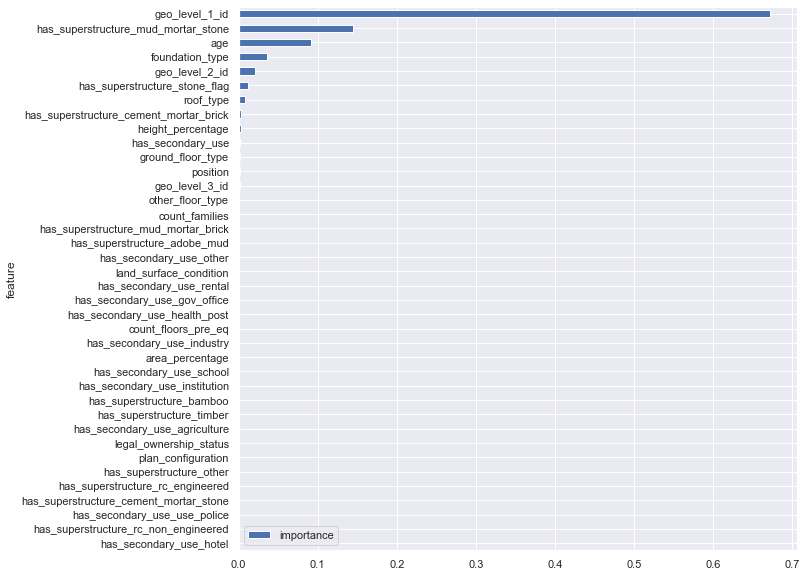

In [103]:
dectree_fi = pd.DataFrame({'importance':dectree.feature_importances_})    
dectree_fi['feature'] = x_train.columns
dectree_fi.sort_values(by='importance', inplace=True)
dectree_fi.plot(kind='barh', x='feature', y='importance',figsize=(10, 10))

## Select the most important features of Decision Tree Classifier

In [104]:
# Create a selector object to identify and select features that have an importance of more than 0.0001 
from sklearn.feature_selection import SelectFromModel

dectree_sfm = SelectFromModel(dectree, threshold=0.0001)
dectree_sfm.fit(x_train, y_train.values.ravel())

SelectFromModel(estimator=DecisionTreeClassifier(class_weight=None,
                                                 criterion='gini', max_depth=6,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 presort=False,
                                                 random_state=None,
                                                 splitter='best'),
                max_features=None, norm_order=1, prefit=False,
                threshold=0.0001)

## List down the selected importance features of Decision Tree Classifier

In [105]:
# Print the names of the selected most important features
for index in dectree_sfm.get_support(indices=True):
    print(x_train.columns[index])

print()
print('Total number of selected importance features:', len(dectree_sfm.get_support(indices=True)))

geo_level_1_id
geo_level_2_id
geo_level_3_id
age
height_percentage
land_surface_condition
foundation_type
roof_type
ground_floor_type
other_floor_type
position
has_superstructure_adobe_mud
has_superstructure_mud_mortar_stone
has_superstructure_stone_flag
has_superstructure_mud_mortar_brick
has_superstructure_cement_mortar_brick
count_families
has_secondary_use
has_secondary_use_other

Total number of selected importance features: 19


## Create the importance features of train and test dataset

In [106]:
x_dectree_importance_train = dectree_sfm.transform(x_train)
x_dectree_importance_test = dectree_sfm.transform(x_test)

## Run a new Decision Tree Classifier containing most importance features

In [107]:
start_time = time.time()

dectree_importance = DecisionTreeClassifier(max_depth = 6)
dectree_importance.fit(x_dectree_importance_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.8966002464294434 seconds ---


## Confusion Matrix and Classification Accuracy of the Decision Tree Classifer (Importance features)

Goodness of Fit of Decision Tree Model (Importance Features)
Classification Accuracy of Train Dataset: 0.6586579048349962
Classification Accuracy of Test Dataset: 0.6598300109360911



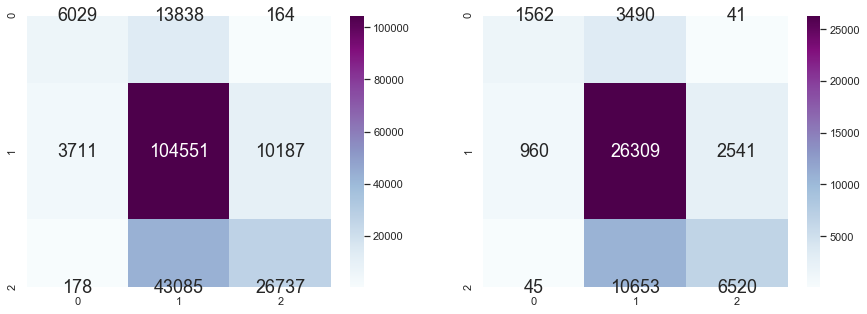

In [108]:
dectree_importance_train_pred = dectree_importance.predict(x_dectree_importance_train)
dectree_importance_test_pred = dectree_importance.predict(x_dectree_importance_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Decision Tree Model (Importance Features)")
print("Classification Accuracy of Train Dataset:", dectree_importance.score(x_dectree_importance_train, y_train))
print("Classification Accuracy of Test Dataset:", dectree_importance.score(x_dectree_importance_test, y_test))
print()

# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(15, 5))

#Train Matrix
dectree_importance_train_matrix = confusion_matrix(y_train, dectree_importance_train_pred)
sb.heatmap(dectree_importance_train_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap = "BuPu")

#Test Matrix
dectree_importance_test_matrix = confusion_matrix(y_test, dectree_importance_test_pred)
sb.heatmap(dectree_importance_test_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap = "BuPu")

## Comparing Decision Tree Classifier with and without Importance Features

In [109]:
print("Goodness of Fit of Decision Tree Model")
print("Classification Accuracy for Train Dataset \t:", dectree.score(x_train, y_train))
print("Classification Accuracy for Test Dataset \t:", dectree.score(x_test, y_test))
print('Number of columns been used:', (len(x_train.columns)))
class_acc_dectree_test = dectree.score(x_test, y_test)

print()

print("Goodness of Fit of Decision Tree Model (Importance Features)")
print("Classification Accuracy of Train Dataset \t:", dectree_importance.score(x_dectree_importance_train, y_train))
print("Classification Accuracy of Test Dataset \t:", dectree_importance.score(x_dectree_importance_test, y_test))
print('Number of columns been used for importance features:', len(dectree_sfm.get_support(indices=True)))
class_acc_dectree_test_fi = dectree_importance.score(x_dectree_importance_test, y_test)

Goodness of Fit of Decision Tree Model
Classification Accuracy for Train Dataset 	: 0.6586579048349962
Classification Accuracy for Test Dataset 	: 0.6598300109360911
Number of columns been used: 38

Goodness of Fit of Decision Tree Model (Importance Features)
Classification Accuracy of Train Dataset 	: 0.6586579048349962
Classification Accuracy of Test Dataset 	: 0.6598300109360911
Number of columns been used for importance features: 19


## Observation: By using Decision Tree Classifier with Importance Features, we manage to use lesser predictors and still manage to get the same classification accuracy for train and test dataset.

## Comparing the Memory Usage of Importance Features with the Original Dataset

In [110]:
dectree_train_fi = [] 
for index in dectree_sfm.get_support(indices=True):
    dectree_train_fi.append(x_train.columns[index]) 

 

dectree_train_fi_ms = pd.DataFrame(x_train[dectree_train_fi])

 

print('Memory usage for original dataset:', x_train.memory_usage(deep = 'true').sum())
print('Memory usage for importance features dataset:', dectree_train_fi_ms.memory_usage(deep = 'true').sum())

 

memory_usage = x_train.memory_usage(deep = 'true').sum() - dectree_train_fi_ms.memory_usage(deep = 'true').sum()
print('The difference of the memory usage:',memory_usage, 'bytes')

Memory usage for original dataset: 53370880
Memory usage for importance features dataset: 24600640
The difference of the memory usage: 28770240 bytes


## Observation: Hence, by selecting only the most importance features, we can observe that lesser columns were been used and this helps to decrease of memory usage. 

## We will be using Random Forest and Cat Boost Models to compare with Decision Tree Model to observe which one has the highest classification accuracy. All the models will be using the same dataset as Decision Tree Model

## Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier
start_time = time.time()

#Parameters for the RandomForestClassifier
#n_estimators = represents the number of the trees in the forest
#n_jobs = -1 is to use up all the CPUs to run faster
#min_samples_leaf: The minimum number of samples required to be at a leaf node

rf = RandomForestClassifier(n_estimators = 100, n_jobs = -1, min_samples_leaf = 5)
rf.fit(x_train,y_train.values.ravel())
print("--- %s seconds ---" % (time.time() - start_time))

--- 14.429115295410156 seconds ---


## Confusion Matrix and Classification Accuracy of Random Forest Classifier

Goodness of Fit of Random Forest Model
Classification Accuracy of train dataset: 0.7827609363008442
Classification Accuracy of test dataset: 0.7235087584658775


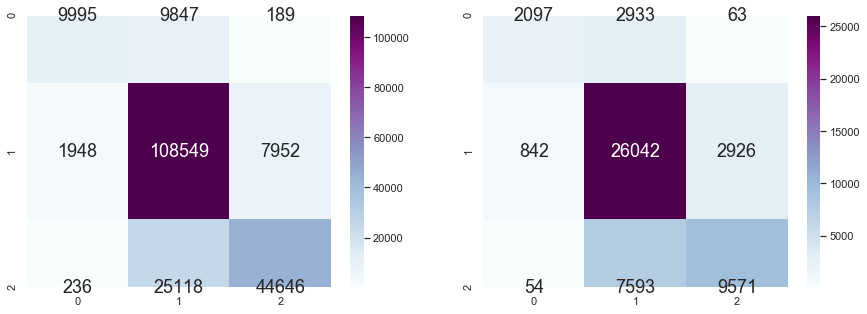

In [112]:
# Predict the Response corresponding to Predictors
rf_train_pred = rf.predict(x_train)
rf_test_pred = rf.predict(x_test)

# Print the Classification Accuracy
print("Goodness of Fit of Random Forest Model")
print("Classification Accuracy of train dataset:", rf.score(x_train, y_train))
print("Classification Accuracy of test dataset:", rf.score(x_test, y_test))

# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(15, 5))

#Train Matrix
rf_train_matrix = confusion_matrix(y_train, rf_train_pred)
sb.heatmap(rf_train_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap = "BuPu")

#Test Matrix
rf_test_matrix = confusion_matrix(y_test, rf_test_pred)
sb.heatmap(rf_test_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap = "BuPu")

## Listing down the gini importance of each feature from Random Forest Classifier in descending order

In [113]:
rf_fi = pd.DataFrame(data=rf.feature_importances_,index = x_train.columns,
                   columns=['importance']).sort_values('importance',ascending=False)
rf_fi

,importance
geo_level_1_id,0.264597
geo_level_2_id,0.130149
geo_level_3_id,0.102283
age,0.065272
area_percentage,0.056572
foundation_type,0.048640
height_percentage,0.041937
roof_type,0.037999
has_superstructure_mud_mortar_stone,0.033498
ground_floor_type,0.024990


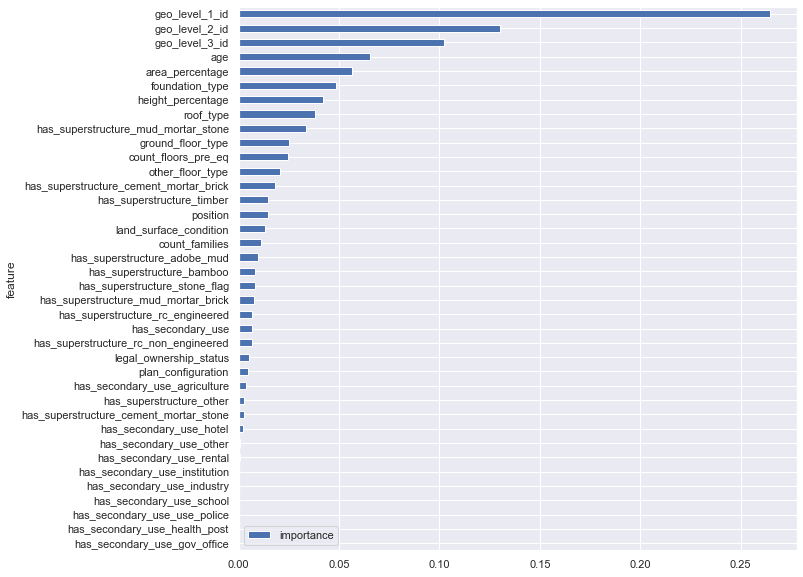

In [114]:
rf_fi = pd.DataFrame({'importance':rf.feature_importances_})    
rf_fi['feature'] = x_train.columns
rf_fi.sort_values(by='importance', inplace=True)
rf_fi.plot(kind='barh', x='feature', y='importance',figsize=(10, 10))

 ## Identify and select the most important features of Random Forest Classifier

In [121]:
# Create a selector object to identify and select features that have an importance of more than 0.01 
rf_sfm_fi = SelectFromModel(rf, threshold=0.01) 
rf_sfm_fi.fit(x_train, y_train.values.ravel())

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=5,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
    

## List down the selected importance features of Random Forest Classifier

In [122]:
# Print the names of the most important features
for index in rf_sfm_fi.get_support(indices=True):
    print(x_train.columns[index])
    
print()
print('Total number of columns will be using for importance features:', len(rf_sfm_fi.get_support(indices=True)))

geo_level_1_id
geo_level_2_id
geo_level_3_id
count_floors_pre_eq
age
area_percentage
height_percentage
land_surface_condition
foundation_type
roof_type
ground_floor_type
other_floor_type
position
has_superstructure_adobe_mud
has_superstructure_mud_mortar_stone
has_superstructure_cement_mortar_brick
has_superstructure_timber
count_families

Total number of columns will be using for importance features: 18


## Create importance features of train and test dataset

In [123]:
x_important_train = rf_sfm_fi.transform(x_train)
x_important_test = rf_sfm_fi.transform(x_test)

## Run a new random forest classifier containing the most importance features

In [126]:
start_time = time.time()

rf_importance = RandomForestClassifier(n_estimators=100, n_jobs=-1, min_samples_leaf = 5)
rf_importance.fit(x_important_train, y_train.values.ravel())

print("--- %s seconds ---" % (time.time() - start_time))

--- 11.448453426361084 seconds ---


## Confusion Matrix and Classification Accuracy of the Random Forest Classifer (Importance features)

Goodness of Fit of Random Forest Model (Importance Features)
Classification Accuracy of Train Dataset: 0.8036886032233308
Classification Accuracy of Test Dataset: 0.72678958577157



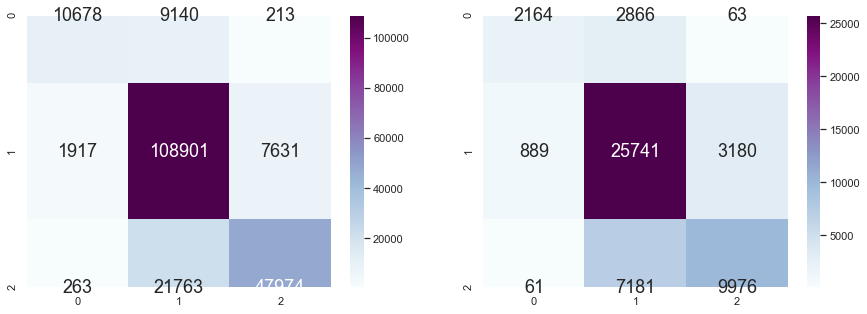

In [127]:
rf_importance_train_pred = rf_importance.predict(x_important_train)
rf_importance_test_pred = rf_importance.predict(x_important_test)

# Check the Goodness of Fit
print("Goodness of Fit of Random Forest Model (Importance Features)")
print("Classification Accuracy of Train Dataset:", rf_importance.score(x_important_train, y_train))
print("Classification Accuracy of Test Dataset:", rf_importance.score(x_important_test, y_test))
print()

# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(15, 5))

#Train Matrix
rf_importance_train_matrix = confusion_matrix(y_train, rf_importance_train_pred)
sb.heatmap(rf_importance_train_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap = "BuPu")

#Test Matrix
rf_importance_test_matrix = confusion_matrix(y_test, rf_importance_test_pred)
sb.heatmap(rf_importance_test_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap = "BuPu")

## Comparing Random Forest Classifier with and without Importance Features

In [128]:
print("Goodness of Fit of Random Forest Model")
print("Classification Accuracy of train dataset:", rf.score(x_train, y_train))
print("Classification Accuracy of test dataset:", rf.score(x_test, y_test))
print('Number of columns been used:', (len(x_train.columns)))
class_acc_rf_test = rf.score(x_test, y_test)

print()

print("Goodness of Fit of Random Forest Model (Importance Features)")
print("Classification Accuracy of Train Dataset:", rf_importance.score(x_important_train, y_train))
print("Classification Accuracy of Test Dataset:", rf_importance.score(x_important_test, y_test))
print('Number of columns been used for importance features:', len(rf_sfm_fi.get_support(indices=True)))
class_acc_rf_test_fi = rf_importance.score(x_important_test, y_test)

Goodness of Fit of Random Forest Model
Classification Accuracy of train dataset: 0.7827609363008442
Classification Accuracy of test dataset: 0.7235087584658775
Number of columns been used: 38

Goodness of Fit of Random Forest Model (Importance Features)
Classification Accuracy of Train Dataset: 0.8036886032233308
Classification Accuracy of Test Dataset: 0.72678958577157
Number of columns been used for importance features: 18


# Comparing the Memory Usage of Importance Features with the Original Dataset

In [129]:
rf_sfm_fi_data = [] 
for index in rf_sfm_fi.get_support(indices=True):
    rf_sfm_fi_data.append(x_train.columns[index]) 

 

rf_sfm_fi_ms = pd.DataFrame(x_train[rf_sfm_fi_data])

 

print('Memory usage for original dataset:', x_train.memory_usage(deep = 'true').sum())
print('Memory usage for importance features dataset:', rf_sfm_fi_ms.memory_usage(deep = 'true').sum())

 

memory_usage_rf = x_train.memory_usage(deep = 'true').sum() - rf_sfm_fi_ms.memory_usage(deep = 'true').sum()
print('The difference of the memory usage:',memory_usage_rf, 'bytes')

Memory usage for original dataset: 53370880
Memory usage for importance features dataset: 22932800
The difference of the memory usage: 30438080 bytes


## Observation: By identifying and selected the importance features, we did improve the accuracy of the Random Forest Classifier. In additional, the number of predictors been used is much lesser and this will also help to reduce computational cost and time to train the model. 

## Cat Boost Classifier

In [130]:
from catboost import CatBoostClassifier
start_time = time.time()
#Parameters
#Iterations: The number of trees to be built
#Verbose: output info of training process every 10 iterations
#Learning_rate = 1 : Used for reducing the gradient step

catboost = CatBoostClassifier(iterations = 100, verbose = 10, learning_rate = 1)

catboost.fit(x_train,y_train,       #data to train on
         eval_set=(x_test,y_test),  #data to validate on
         use_best_model = True,     #True if we don`t want to save trees created after iteration
         plot=True)                 #True for visulization of the training process
print("--- %s seconds ---" % (time.time() - start_time))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8101666	test: 0.8110549	best: 0.8110549 (0)	total: 128ms	remaining: 12.6s
10:	learn: 0.6893744	test: 0.6919924	best: 0.6919924 (10)	total: 1.16s	remaining: 9.41s
20:	learn: 0.6704570	test: 0.6764414	best: 0.6764414 (20)	total: 2.16s	remaining: 8.13s
30:	learn: 0.6577137	test: 0.6652830	best: 0.6652830 (30)	total: 3.07s	remaining: 6.84s
40:	learn: 0.6459794	test: 0.6546217	best: 0.6546217 (40)	total: 3.97s	remaining: 5.72s
50:	learn: 0.6378074	test: 0.6481319	best: 0.6481319 (50)	total: 4.8s	remaining: 4.61s
60:	learn: 0.6306213	test: 0.6453156	best: 0.6453156 (60)	total: 5.68s	remaining: 3.63s
70:	learn: 0.6251300	test: 0.6426132	best: 0.6426132 (70)	total: 6.55s	remaining: 2.68s
80:	learn: 0.6205572	test: 0.6404510	best: 0.6404510 (80)	total: 7.31s	remaining: 1.71s
90:	learn: 0.6169840	test: 0.6390623	best: 0.6390623 (90)	total: 8.02s	remaining: 793ms
99:	learn: 0.6133237	test: 0.6376028	best: 0.6374405 (97)	total: 8.62s	remaining: 0us

bestTest = 0.6374404925
bestIteratio

## Confusion Matrix and Classification Accuracy of Cat Boost Classifier

Goodness of Fit of Cat Boost Model
Classification Accuracy of Train Dataset: 0.7269522256331543
Classification Accuracy of Test Dataset: 0.7151436081425913



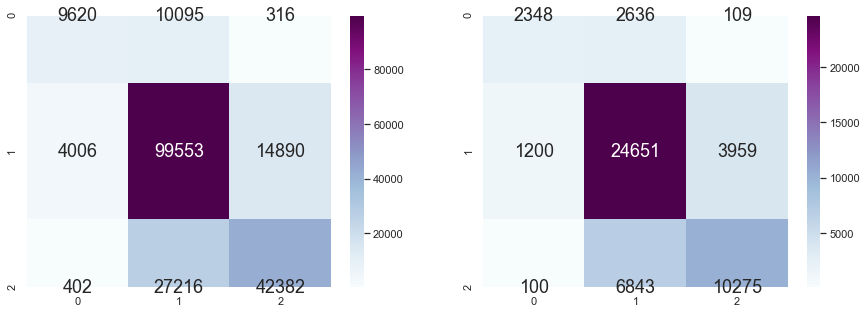

In [132]:
catboost_train_pred = catboost.predict(x_train)
catboost_test_pred = catboost.predict(x_test)

# Check the Goodness of Fit
print("Goodness of Fit of Cat Boost Model")
print("Classification Accuracy of Train Dataset:", catboost.score(x_train, y_train))
print("Classification Accuracy of Test Dataset:", catboost.score(x_test, y_test))
print()

# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(15, 5))

#Train Matrix
catboost_train_matrix = confusion_matrix(y_train, catboost_train_pred)
sb.heatmap(catboost_train_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap = "BuPu")

#Test Matrix
catboost_test_matrix = confusion_matrix(y_test, catboost_test_pred)
sb.heatmap(catboost_test_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap = "BuPu")

## Listing down the gini importance of each feature from Cat Boost Classifier in descending order

In [133]:
catboost_fi=pd.DataFrame(data=catboost.feature_importances_,index=x_train.columns,
                   columns=['importance']).sort_values('importance',ascending=False)
catboost_fi

,importance
geo_level_1_id,44.049343
geo_level_2_id,13.131204
has_superstructure_mud_mortar_stone,7.461500
age,5.327613
geo_level_3_id,4.739241
foundation_type,3.941112
roof_type,2.097398
ground_floor_type,1.980603
has_superstructure_cement_mortar_brick,1.818605
other_floor_type,1.743296


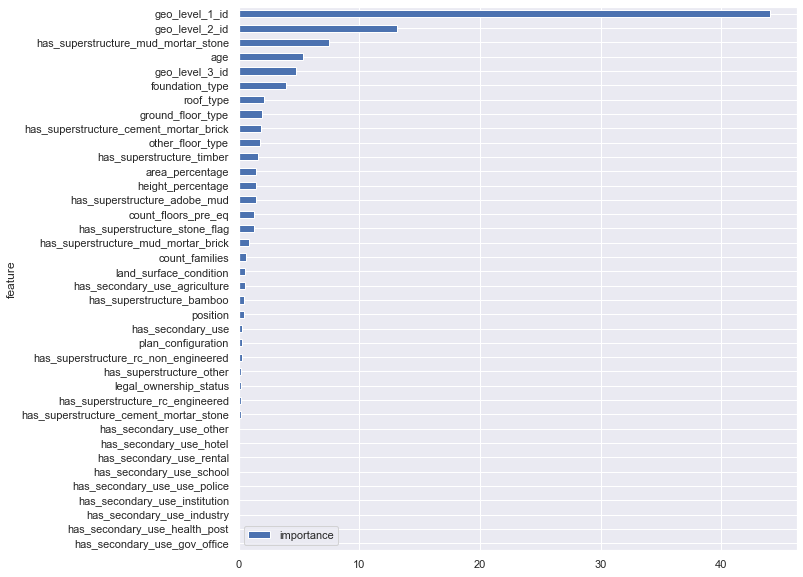

In [134]:
catboost_fi_data = pd.DataFrame({'importance':catboost.feature_importances_})    
catboost_fi_data['feature'] = x_train.columns
catboost_fi_data.sort_values(by='importance', inplace=True)
catboost_fi_data.plot(kind='barh', x='feature', y='importance',figsize=(10, 10))

## Select the most important features of Cat Boost Classifier

In [135]:
# Create a selector object to identify and select features that have an importance of more than 0.01 
catboost_sfm_fi = SelectFromModel(catboost, threshold=0.01)
catboost_sfm_fi.fit(x_train, y_train.values.ravel())

0:	learn: 0.8101666	total: 123ms	remaining: 12.2s
10:	learn: 0.6893744	total: 772ms	remaining: 6.24s
20:	learn: 0.6704570	total: 1.56s	remaining: 5.88s
30:	learn: 0.6577137	total: 2.31s	remaining: 5.15s
40:	learn: 0.6459794	total: 3.11s	remaining: 4.47s
50:	learn: 0.6378074	total: 3.73s	remaining: 3.59s
60:	learn: 0.6306213	total: 4.35s	remaining: 2.78s
70:	learn: 0.6251300	total: 5.09s	remaining: 2.08s
80:	learn: 0.6205572	total: 5.82s	remaining: 1.36s
90:	learn: 0.6169840	total: 6.45s	remaining: 638ms
99:	learn: 0.6133237	total: 7.11s	remaining: 0us


SelectFromModel(estimator=<catboost.core.CatBoostClassifier object at 0x0000024700FB6EC8>,
                max_features=None, norm_order=1, prefit=False, threshold=0.01)

## List down the selected importance features of Cat Boost Classifier

In [136]:
# Print the names of the most important features
for index in catboost_sfm_fi.get_support(indices=True):
    print(x_train.columns[index])

print()
print('Total number of columns will be using for importance features:', len(catboost_sfm_fi.get_support(indices=True)))

geo_level_1_id
geo_level_2_id
geo_level_3_id
count_floors_pre_eq
age
area_percentage
height_percentage
land_surface_condition
foundation_type
roof_type
ground_floor_type
other_floor_type
position
plan_configuration
has_superstructure_adobe_mud
has_superstructure_mud_mortar_stone
has_superstructure_stone_flag
has_superstructure_cement_mortar_stone
has_superstructure_mud_mortar_brick
has_superstructure_cement_mortar_brick
has_superstructure_timber
has_superstructure_bamboo
has_superstructure_rc_non_engineered
has_superstructure_rc_engineered
has_superstructure_other
legal_ownership_status
count_families
has_secondary_use
has_secondary_use_agriculture
has_secondary_use_hotel
has_secondary_use_rental
has_secondary_use_other

Total number of columns will be using for importance features: 32


## Create the importance features of train and test dataset

In [137]:
x_important_train = catboost_sfm_fi.transform(x_train)
x_important_test = catboost_sfm_fi.transform(x_test)

## Run a new Cat Boost Classifier containing the most importance features

In [138]:
start_time = time.time()
catboost_fi = CatBoostClassifier(iterations = 100, verbose = 10, learning_rate = 1)

catboost_fi.fit(x_important_train,y_train,      
         eval_set=(x_important_test,y_test),  
         use_best_model = True,     
         plot=True)                 
print("--- %s seconds ---" % (time.time() - start_time))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8135531	test: 0.8139331	best: 0.8139331 (0)	total: 135ms	remaining: 13.4s
10:	learn: 0.6932528	test: 0.6963307	best: 0.6963307 (10)	total: 925ms	remaining: 7.48s
20:	learn: 0.6726294	test: 0.6791163	best: 0.6791163 (20)	total: 1.61s	remaining: 6.05s
30:	learn: 0.6591547	test: 0.6680423	best: 0.6680423 (30)	total: 2.24s	remaining: 4.99s
40:	learn: 0.6482256	test: 0.6585464	best: 0.6585464 (40)	total: 2.9s	remaining: 4.17s
50:	learn: 0.6393035	test: 0.6523042	best: 0.6523042 (50)	total: 3.64s	remaining: 3.5s
60:	learn: 0.6317545	test: 0.6479548	best: 0.6479548 (60)	total: 4.49s	remaining: 2.87s
70:	learn: 0.6263678	test: 0.6451068	best: 0.6451068 (70)	total: 5.13s	remaining: 2.1s
80:	learn: 0.6206450	test: 0.6432768	best: 0.6432768 (80)	total: 6.02s	remaining: 1.41s
90:	learn: 0.6157920	test: 0.6407288	best: 0.6407288 (90)	total: 6.81s	remaining: 674ms
99:	learn: 0.6116151	test: 0.6384952	best: 0.6384952 (99)	total: 7.57s	remaining: 0us

bestTest = 0.638495193
bestIteration =

## Confusion Matrix and Classification Accuracy of the Cat Boost Classifer (Importance features)

Goodness of Fit of Cat Boost Model (Importance Features)
Cat Boost Classification Accuracy of Train Dataset: 0.7270481580966999
Cat Boost Classification Accuracy of Test Dataset: 0.7155657028836745



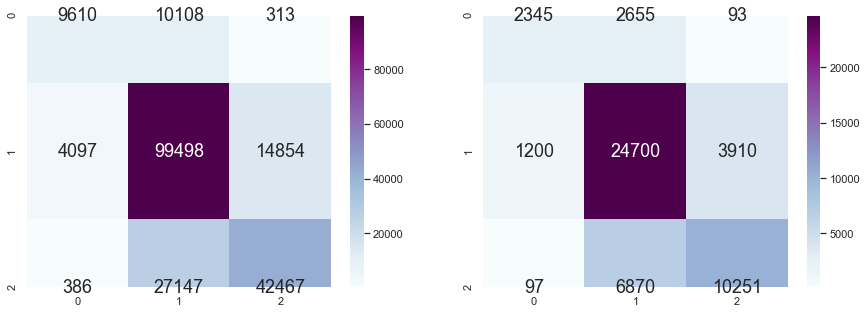

In [139]:
catboost_fi_train_pred = catboost_fi.predict(x_important_train)
catboost_fi_test_pred = catboost_fi.predict(x_important_test)

# Check the Goodness of Fit
print("Goodness of Fit of Cat Boost Model (Importance Features)")
print("Cat Boost Classification Accuracy of Train Dataset:", catboost_fi.score(x_important_train, y_train))
print("Cat Boost Classification Accuracy of Test Dataset:", catboost_fi.score(x_important_test, y_test))
print()

# Plot the Confusion Matrix
f, axes = plt.subplots(1, 2, figsize=(15, 5))

#Train Matrix
catboost_fi_train_matrix = confusion_matrix(y_train, catboost_fi_train_pred)
sb.heatmap(catboost_fi_train_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0], cmap = "BuPu")

#Test Matrix
catboost_fi_test_matrix = confusion_matrix(y_test, catboost_fi_test_pred)
sb.heatmap(catboost_fi_test_matrix, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1], cmap = "BuPu")

## Comparing Cat Boost Classifier with and without Importance Features

In [140]:
# Check the Goodness of Fit
print("Goodness of Fit of Cat Boost Model")
print("Classification Accuracy of Train Dataset:", catboost.score(x_train, y_train))
print("Classification Accuracy of Test Dataset:", catboost.score(x_test, y_test))
print('Number of columns been used:', (len(x_train.columns)))
class_acc_catboost_test =  catboost.score(x_test, y_test)
print()

print("Goodness of Fit of Cat Boost Model (Importance Features)")
print("Cat Boost Classification Accuracy of Train Dataset:", catboost_fi.score(x_important_train, y_train))
print("Cat Boost Classification Accuracy of Test Dataset:", catboost_fi.score(x_important_test, y_test))
print('Number of columns been used for importance features:', len(catboost_sfm_fi.get_support(indices=True)))
class_acc_catboost_test_fi = catboost_fi.score(x_important_test, y_test)
print()

Goodness of Fit of Cat Boost Model
Classification Accuracy of Train Dataset: 0.7269522256331543
Classification Accuracy of Test Dataset: 0.7151436081425913
Number of columns been used: 38

Goodness of Fit of Cat Boost Model (Importance Features)
Cat Boost Classification Accuracy of Train Dataset: 0.7270481580966999
Cat Boost Classification Accuracy of Test Dataset: 0.7155657028836745
Number of columns been used for importance features: 32



# Comparing the memory usage of importance features with the dataset

In [ ]:
catboost_sfm_fi_data = [] 
for index in catboost_sfm_fi.get_support(indices=True):
    catboost_sfm_fi_data.append(x_train.columns[index]) 

catboost_sfm_fi_ms = pd.DataFrame(x_train[catboost_sfm_fi_data])


print('Memory usage for original dataset:', x_train.memory_usage(deep = 'true').sum())
print('Memory usage for importance features dataset:', catboost_sfm_fi_ms.memory_usage(deep = 'true').sum())
 

memory_usage_catboost = x_train.memory_usage(deep = 'true').sum() - catboost_sfm_fi_ms.memory_usage(deep = 'true').sum()
print('The difference of the memory usage:',memory_usage_catboost, 'bytes')

## Observation: We can observe that the difference of using Cat Boost Classifier with and without Importance features. By identifying and select the importance features, we did improve the accuracy of the Cat Boost Classifier. In additional, the number of predictors been used is much lesser and this will also help to reduce computational cost and time to train the model

## Comparing all of the Models Classification Accuracy of Test Dataset

In [ ]:
print("Goodness of Fit of Decision Tree Model")
print("Classification Accuracy for Test Dataset \t:", class_acc_dectree_test)
print()

print("Goodness of Fit of Decision Tree Model (Importance Features)")
print("Classification Accuracy of Test Dataset \t:", class_acc_dectree_test_fi)
print()

print("Goodness of Fit of Random Forest Model")
print("Classification Accuracy of test dataset \t:", class_acc_rf_test)
print()

print("Goodness of Fit of Random Forest Model (Importance Features)")
print("Classification Accuracy of Test Dataset \t:", class_acc_rf_test_fi)
print()

print("Goodness of Fit of Cat Boost Model")
print("Classification Accuracy of Test Dataset \t:", class_acc_catboost_test)
print()

print("Goodness of Fit of Cat Boost Model (Importance Features)")
print("Classification Accuracy of Test Dataset \t:", class_acc_catboost_test_fi)


## Observation: Based on the comparison of all the model classification accuracy on test dataset, we can see that the random forest classifier containing only the most importance features has the best accuracy among other models to predict the damage grade for the buildings.

In [ ]:
testDamage = pd.read_csv('submission_format.csv')
testDamage.drop(['damage_grade'], axis=1, inplace=True)
testDamage.head()

## Create a new dataset with only selection of Random Forest Importance Features columns

In [ ]:
rf_sfm_fi_testdata = [] 
for index in rf_sfm_fi.get_support(indices=True):
    rf_sfm_fi_testdata.append(x_train.columns[index]) 

testData_pred = pd.DataFrame(testData[rf_sfm_fi_testdata])
testData_pred.head()

## Predict the damage grade on the Dataset

In [ ]:
rf_pred_test=rf_importance.predict(testData_pred)

# Summarize the Actuals and Predictions
y_pred = pd.DataFrame(rf_pred_test, columns = ["damage_grade"], index = testData_pred.index)
prediction = pd.concat([testDamage['building_id'],y_pred], axis = 1)
prediction.head(10)

## Probability of the damage grade for each buildings

In [ ]:
y_prob = rf.predict_proba(testData)
np.set_printoptions(suppress=True, precision = 3)
y_prob

## Displaying the prediction damage grade % in pie chart

In [ ]:
# Pie chart
prediction_grade_df = prediction.copy()
prediction_grade_1_count = len(prediction_grade_df[prediction_grade_df['damage_grade'] == 1].index)
prediction_grade_2_count = len(prediction_grade_df[prediction_grade_df['damage_grade'] == 2].index)
prediction_grade_3_count = len(prediction_grade_df[prediction_grade_df['damage_grade'] == 3].index)

labels = ['damage_grade_1', 'damage_grade_2', 'damage_grade_3']
sizes = [prediction_grade_1_count, prediction_grade_2_count, prediction_grade_3_count]
fig1, ax1 = plt.subplots(figsize=(6, 7))
explode = (0, 0.1, 0)  
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90) 
plt.show()